<a href="https://colab.research.google.com/github/krish146/Car-Dekho-Dataset-Analysis/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DA_project/car_Dekho_DA.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
### Analysing DataSet of Car_Dekho Company

In [ ]:
# 1)From which manufacturing year to which manufacturing year vehicles are present in this data ?
df = pd.DataFrame(df)
max_year=df["Year"].max()
min_year=df["Year"].min()
print(f"From ${min_year} to ${max_year}")

From $2003 to $2018


In [ ]:
# 2)What is the lowest price to which a vehicle is sold ?
# 3)What is the highest price to which a vehicle is sold ?
lowest_price=df["Selling_Price"].min()
highest_price=df["Selling_Price"].max()
print(f"Lowest price is ${lowest_price} and highest price is ${highest_price}")

Lowest price is $0.1 and highest price is $35.0


In [ ]:
# 4)How many records are there in this data ?
no_of_records = df.shape[0]
print(f"Total number of records int the dataframe are {no_of_records}")

Total number of records int the dataframe are 301


In [ ]:
# 5)Are there any missing records in this data ?
df.isnull().sum().sum()

0

In [ ]:
# 6)How many different vehicles are present in this data ?
df["Car_Name"].nunique()

98

In [ ]:
# 7)Which is the most sold vehicle in this data ?
df["Car_Name"].value_counts().idxmax()

'city'

In [ ]:
# 8)Does the database include any CNG vehicle ? If yes how many of them are there ?
cng_vehicles=[df["Fuel_Type"]=="CNG"]
print(cng_vehicles[0].sum())

2


In [ ]:
# 9)How many vehicles here are for sell from Individuals directly ?
(df["Seller_Type"]=="Individual").sum()

106

In [ ]:
# 10)Does this database contain auto transmission vehicles ? If yes how many of them are there ?
(df["Transmission"]=="Automatic").sum()

40

In [ ]:
# 11)How many single person owned vehicles are there in this database ?
(df["Owner"]==1).sum()

10

In [ ]:
# 12)Which is the most and least cost depreciated vehicle in data ?
depreciation=df["Present_Price"]-df["Selling_Price"]
df["depreciation"]=depreciation
display(df.loc[depreciation==df["depreciation"].max() ])
display(df.loc[ depreciation==df["depreciation"].min()])



,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0,57.6


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
155,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0,0.03


In [ ]:
# 13)Which brands of vehicles are less affected by cost depreciation ?
df.loc[df["Car_Name"]==df.groupby("Car_Name")["depreciation"].mean().idxmin()]


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
156,TVS Sport,2017,0.48,0.52,15000,Petrol,Individual,Manual,0,0.04


<Axes: >

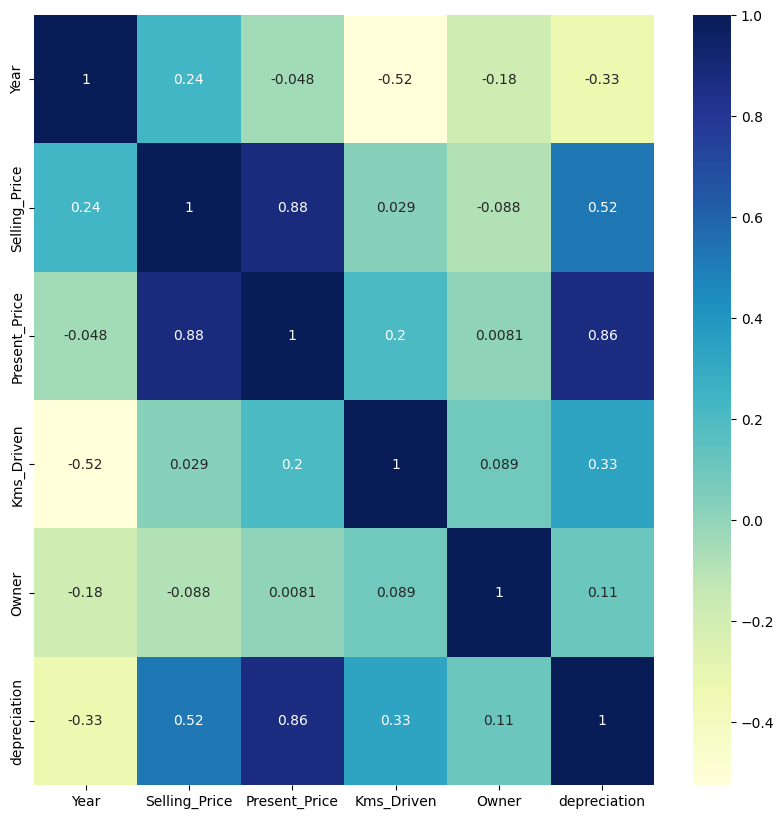

In [ ]:
# 14)Are there any factors which you feel affect the cost depreciation ?
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
numerical_df = df.select_dtypes(include=['float', 'int'])
sns.heatmap(numerical_df.corr(),annot=True,cmap="YlGnBu")

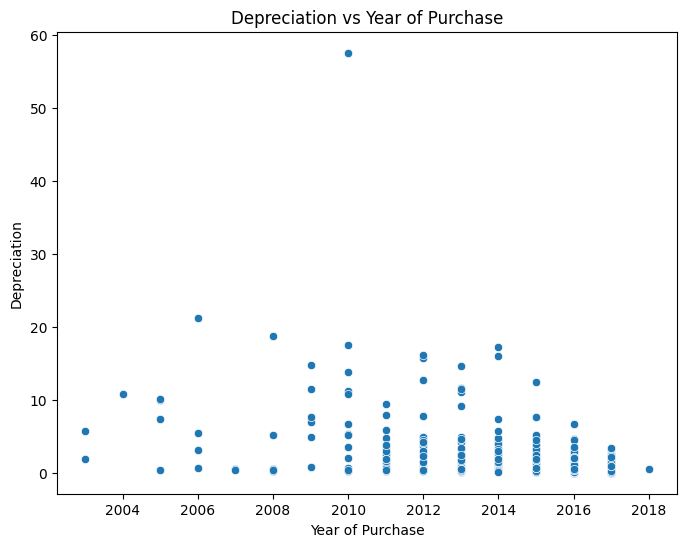

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Year', y='depreciation', data=df)
plt.title('Depreciation vs Year of Purchase')
plt.xlabel('Year of Purchase')
plt.ylabel('Depreciation')
plt.show()


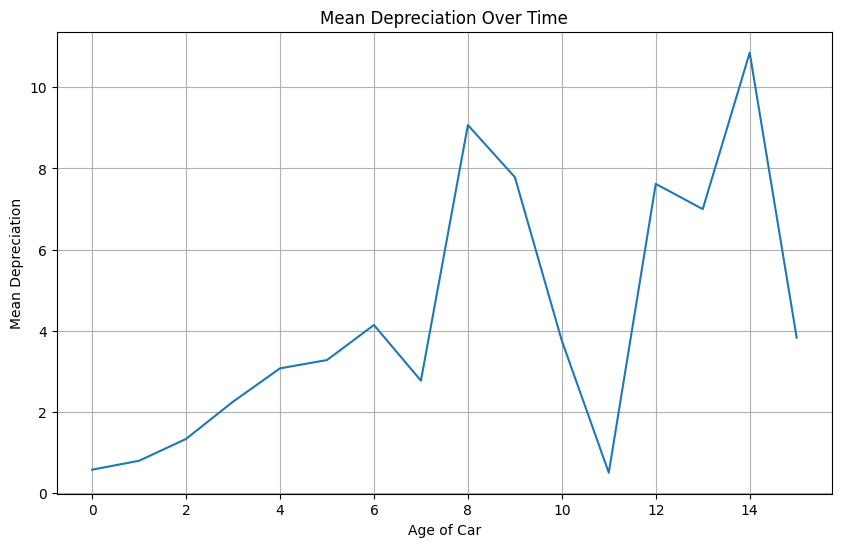

In [ ]:
import datetime

current_year = datetime.datetime.now().year
df['age'] = 2018 - df['Year']

mean_depreciation_by_age = df.groupby('age')['depreciation'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_depreciation_by_age.index, mean_depreciation_by_age.values)
plt.title('Mean Depreciation Over Time')
plt.xlabel('Age of Car')
plt.ylabel('Mean Depreciation')
plt.grid(True)
plt.show()

#Conclusion:Deprecation  is increasing with increasing time

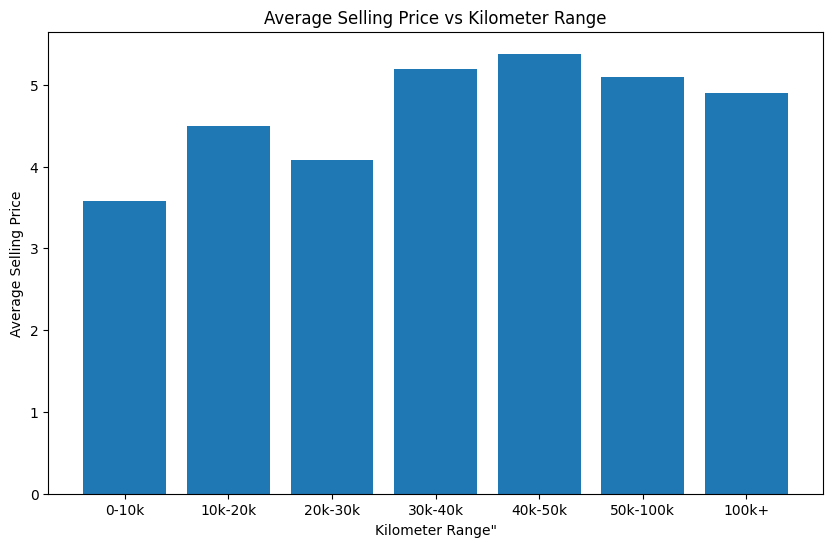

In [ ]:
# 15)In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?

#Yes it is effected by age and distrance driven , concluded during 14 solutions finding
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Kms_Driven'], df['Selling_Price'])
# plt.title('Selling Price vs Distance Driven')
# plt.xlabel('Distance Driven (Kms)')
# plt.ylabel('Selling Price')
# plt.grid(True)
# plt.show()
bins = [0, 10000, 20000, 30000, 40000, 50000, 100000, df['Kms_Driven'].max()]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-100k', '100k+']
df['kms_bins'] = pd.cut(df['Kms_Driven'], bins=bins, labels=labels, include_lowest=True)
avg_price_per_bin = df.groupby('kms_bins')['Selling_Price'].mean()
plt.figure(figsize=(10, 6))
plt.bar(avg_price_per_bin.index, avg_price_per_bin.values)
plt.title('Average Selling Price vs Kilometer Range')
plt.xlabel('Kilometer Range"')
plt.ylabel('Average Selling Price')
plt.show()


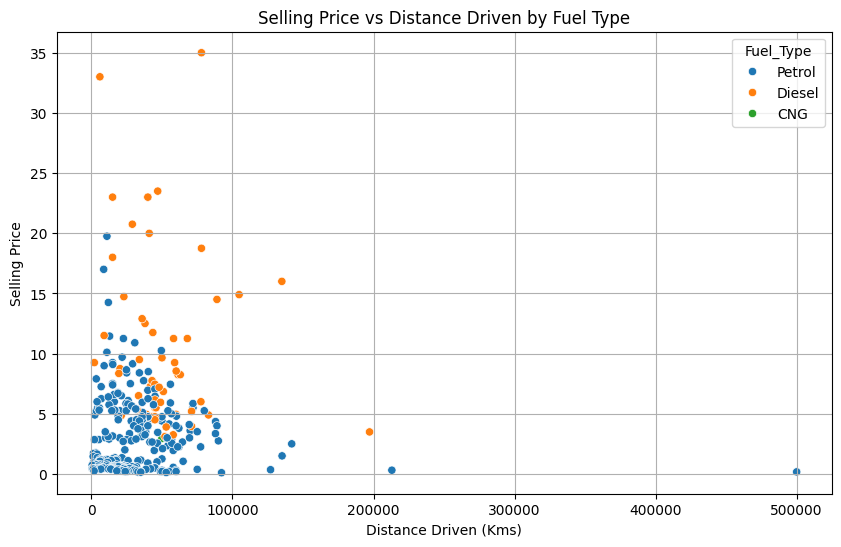

In [ ]:
#Effect of fuel type on KMS Driven and selling price relation
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', hue='Fuel_Type', data=df)
plt.title('Selling Price vs Distance Driven by Fuel Type')
plt.xlabel('Distance Driven (Kms)')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()
#in general diesel cars has higher prices , so selling prices are also high, no new aspects

In [ ]:
# The selling price might not be showing a clean decline in price with kilometers driven because a wide range of brands are mixed up in the data
# Segmenting analysis by vehicle type, brand, or price range will give clearer patterns emerge within subgroups.

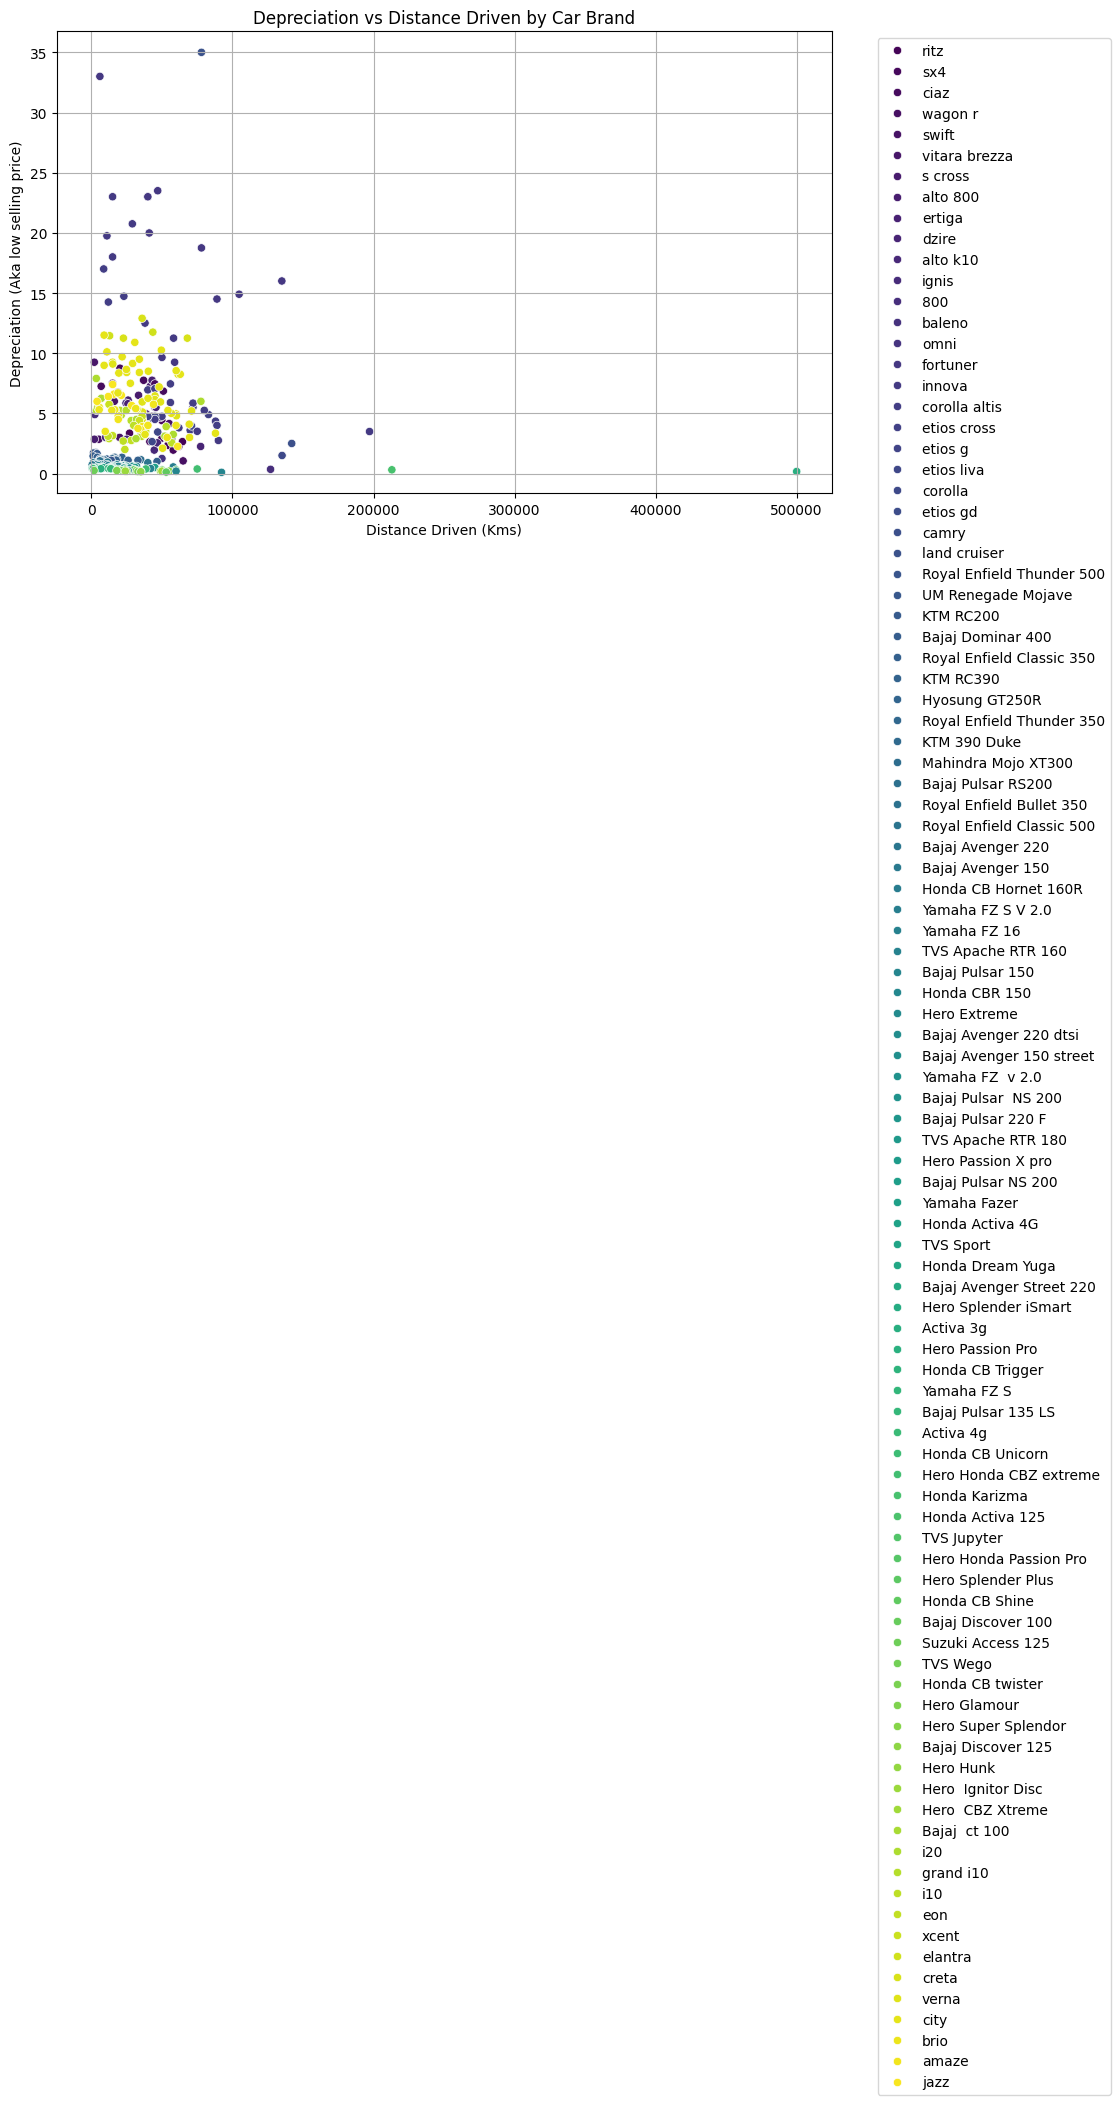

In [ ]:
#checking if there is really a price effect based on kms driven, answer: Yes , so we proceed to divide the groups of car ranges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kms_Driven', y='depreciation', hue='Car_Name', data=df,palette='viridis')
plt.title('Depreciation vs Distance Driven by Car Brand')
plt.xlabel('Distance Driven (Kms)')
plt.ylabel('Depreciation (Aka low selling price)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#so selling price is indeed effected by kms driven
#some car brands has const selling price and some have decreasing selling price as we can see with depreciation
#lets seperate cars and see the relation of selling price vs kms driven

In [ ]:
print(list(df['Car_Name'].unique()))

['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis', '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis', 'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd', 'camry', 'land cruiser', 'Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400', 'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R', 'Royal Enfield Thunder 350', 'KTM 390 Duke ', 'Mahindra Mojo XT300', 'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350', 'Royal Enfield Classic 500', 'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R', 'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160', 'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme', 'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street', 'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F', 'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pulsar NS 200', 'Yamaha Fazer ', 'Honda Activa 4G', 'TVS Sport ', 'Honda Dream Yug

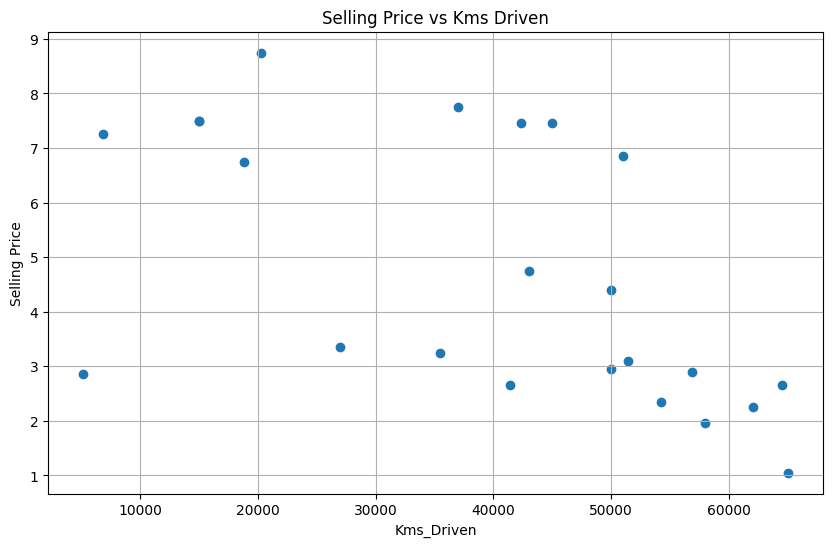

In [ ]:
df_4 = df[df['Car_Name'].isin(df['Car_Name'].unique()[:4])].copy()
df_4['age'] = 2018 - df_4['Year'] #selecting only a specific set of brands

plt.figure(figsize=(10, 6))
plt.scatter(df_4['Kms_Driven'], df_4['Selling_Price'])
plt.title('Selling Price vs Kms Driven')
plt.xlabel('Kms_Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# If we see for a specific set of brands grouped together and decreasing the diversity of brands,

#we can see selling price  decreasing with increasing Kms Driven **Concluded**

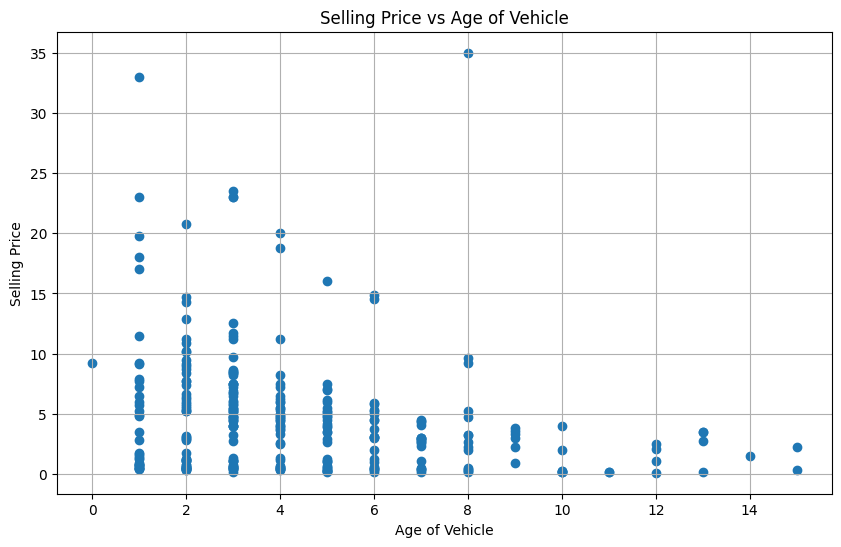

In [ ]:
#Now, Checking upon Age vs Selling price, we see a clear decline, for more visualization we can make a clean plot
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['Selling_Price'])
plt.title('Selling Price vs Age of Vehicle')
plt.xlabel('Age of Vehicle')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

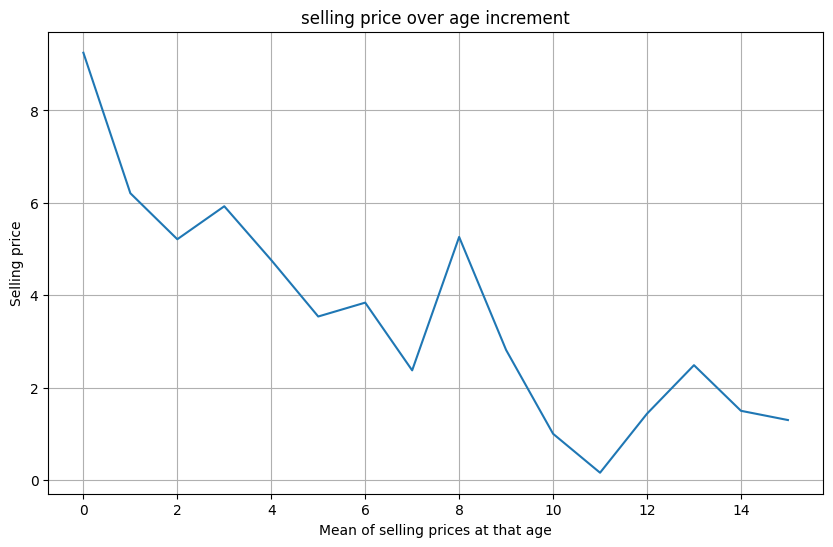

In [ ]:
#more cleaner plot: showing clear decline
mean_depreciation_by_selling = df.groupby('age')['Selling_Price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_depreciation_by_age.index, mean_depreciation_by_selling.values)
plt.title('selling price over age increment')
plt.xlabel('Mean of selling prices at that age')
plt.ylabel('Selling price')
plt.grid(True)
plt.show()

#As age increasing car price is decreasing

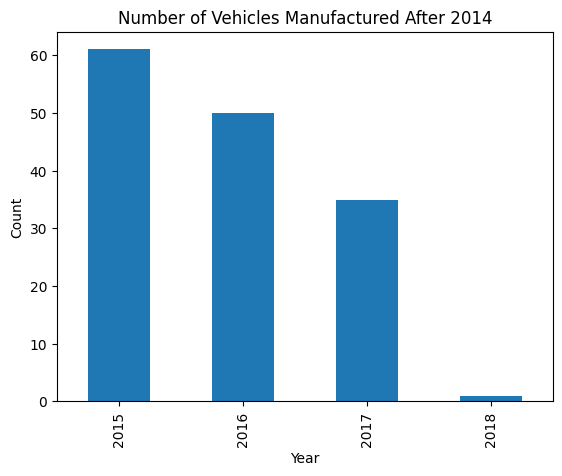

In [ ]:
# 16)Can we get idea about newest vehicles i.e. after 2014 manufactured ?
df_new = df[df['Year'] > 2014]['Year'].value_counts().sort_index()
df_new.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Vehicles Manufactured After 2014")
plt.show()

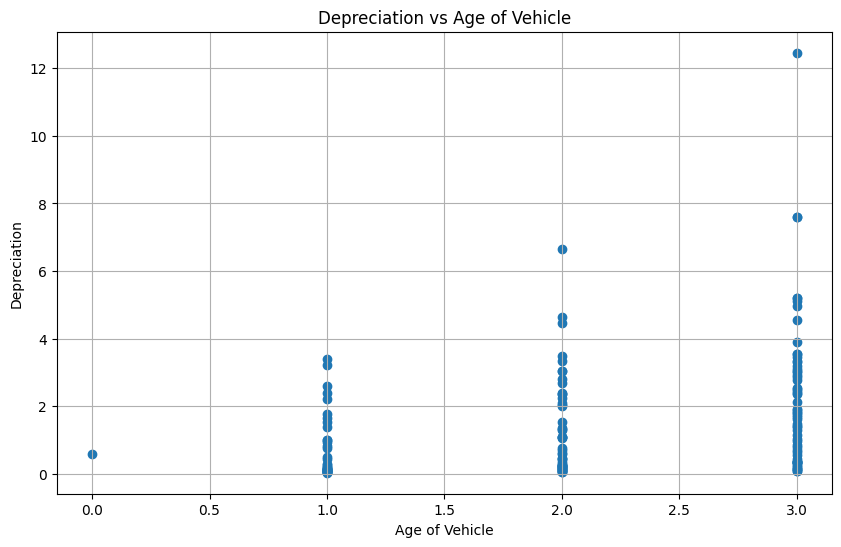

In [ ]:
#Lets check how is depreciation for newer vehicles ?
new_df=df[df['Year'] > 2014]


plt.figure(figsize=(10, 6))
plt.scatter(new_df['age'],new_df['depreciation'])
plt.title('Depreciation vs Age of Vehicle')
plt.xlabel('Age of Vehicle')
plt.ylabel('Depreciation')
plt.grid(True)
plt.show()
#Although its increasing , rate of increase is less

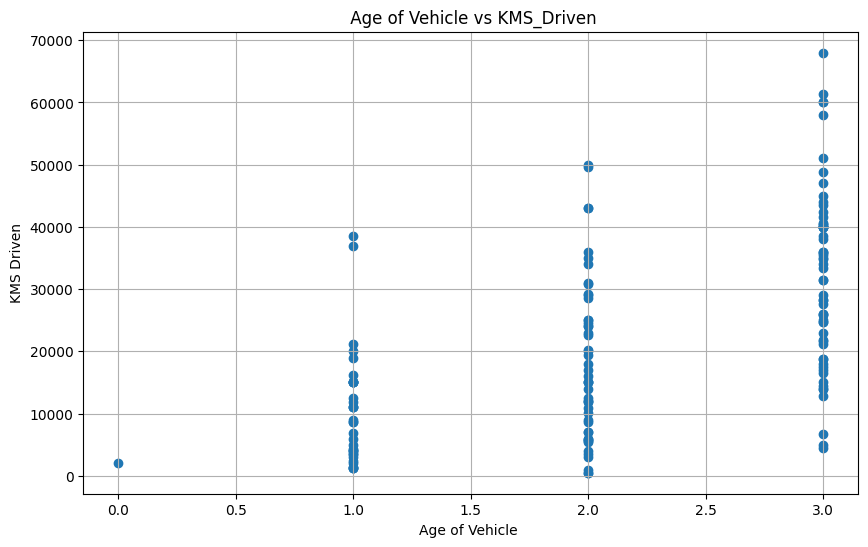

In [ ]:
 #Also lets see if KMS _ Driven is high or less for these new vehicles
plt.figure(figsize=(10, 6))
plt.scatter(new_df['age'],new_df['Kms_Driven'])
plt.title(' Age of Vehicle vs KMS_Driven')
plt.xlabel('Age of Vehicle ')
plt.ylabel('KMS Driven')
plt.grid(True)
plt.show()
#nothing seems out of odinary ...

first quadrant: 1.5


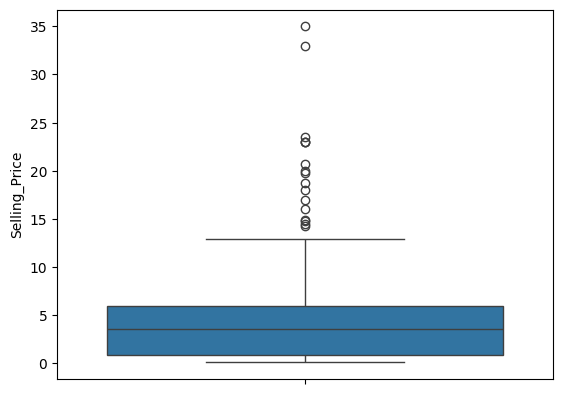

In [ ]:
import seaborn as sns
import numpy as np
sns.boxplot(y=df['Selling_Price'])
# q1=df['Selling_Price'].median() # Most economy bikes are near to ~first quadrant price or max -> median
q1 = np.percentile(df['Selling_Price'], 25)+0.6
print("first quadrant:",q1)

In [ ]:
#17) Which is the oldest bike sold here?
#Bike has  petrol type fuel , less Kms_Driven , less selling price,manual transmission
Bike_df = df[(df['Fuel_Type'] == 'Petrol') & (df['Kms_Driven'] < 50000) & (df['Selling_Price'] < q1) & (df['Transmission'] == 'Manual')]
print(f"Oldest Bike Might my from {Bike_df['Year'].min()}")
display(Bike_df.head())

Oldest Bike Might my from 2007


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation,age,kms_bins
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15,1,0-10k
104,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12,1,0-10k
105,KTM RC390,2015,1.35,2.37,21700,Petrol,Individual,Manual,0,1.02,3,20k-30k
106,Hyosung GT250R,2014,1.35,3.45,16500,Petrol,Individual,Manual,1,2.10,4,10k-20k
107,Royal Enfield Thunder 350,2013,1.25,1.50,15000,Petrol,Individual,Manual,0,0.25,5,10k-20k


In [ ]:
# 18)Which is the newest bike sold here?
print(f"Newest Bike Might my from {Bike_df['Year'].max()}")

Newest Bike Might my from 2017


In [ ]:
# 19)Which is the most sold bike here?
print(f"most sold bike{Bike_df['Car_Name'].value_counts().idxmax()}")

most sold bikeRoyal Enfield Classic 350


In [ ]:
# 20)Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?

Bike_df.loc[:, 'margin'] = Bike_df['Present_Price'] - Bike_df['Selling_Price']
threshold_ratio = 2
good_deals_bikes = Bike_df[Bike_df['margin'] < threshold_ratio]

mileage_threshold = 50000
low_mileage_deals_bikes = Bike_df[Bike_df['Kms_Driven'] < mileage_threshold]

exceptional_deals_bikes = pd.concat([good_deals_bikes, low_mileage_deals_bikes]).drop_duplicates()
exceptional_deals_bikes.reset_index(drop=True, inplace=True)

display(exceptional_deals_bikes.head())
# These bikes got nice deals for some reason

<ipython-input-152-cdcff243ac58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bike_df.loc[:, 'margin'] = Bike_df['Present_Price'] - Bike_df['Selling_Price']


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation,age,kms_bins,margin
0,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15,1,0-10k,0.15
1,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12,1,0-10k,0.12
2,KTM RC390,2015,1.35,2.37,21700,Petrol,Individual,Manual,0,1.02,3,20k-30k,1.02
3,Royal Enfield Thunder 350,2013,1.25,1.50,15000,Petrol,Individual,Manual,0,0.25,5,10k-20k,0.25
4,Royal Enfield Thunder 350,2016,1.20,1.50,18000,Petrol,Individual,Manual,0,0.30,2,10k-20k,0.30


In [ ]:
# 21)Can we find out data of only cars from this data?
q1 = np.percentile(df['Selling_Price'], 25)+0.1
Car_df = df[(df['Kms_Driven'] >= 50000) &
            (df['Selling_Price'] >= q1) &
            (df['Transmission'].isin(['Manual', 'Automatic']))]
display(Car_df.head())

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation,age,kms_bins
11,ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0,3.53,3,50k-100k
14,dzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0,4.96,9,50k-100k
22,sx4,2011,4.40,8.01,50000,Petrol,Dealer,Automatic,0,3.61,7,40k-50k
24,wagon r,2013,2.90,4.41,56879,Petrol,Dealer,Manual,0,1.51,5,50k-100k
26,swift,2013,4.15,5.87,55138,Petrol,Dealer,Manual,0,1.72,5,50k-100k


In [ ]:
# 22)Which is the oldest car sold here?
print(f"Oldest Car Might be from {Car_df['Year'].min()}")


Oldest Car Might be from 2003


In [ ]:
# 23)Which is the newest car sold here?
print(f"Oldest Car Might be from {Car_df['Year'].max()}")

Oldest Car Might be from 2015


In [ ]:
# 24)Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?
Car_df.loc[:,'profit'] = Car_df['Present_Price'] -Car_df['Selling_Price']

threshold_ratio = 2
good_deals = Car_df[Car_df['profit'] < threshold_ratio]

mileage_threshold = 50000
low_mileage_deals = Car_df[Car_df['Kms_Driven'] < mileage_threshold]

exceptional_deals = pd.concat([good_deals, low_mileage_deals]).drop_duplicates()
exceptional_deals.reset_index(drop=True, inplace=True)
display(exceptional_deals.head())

#These cars has gotten the best deals

<ipython-input-156-49f9d037ec27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Car_df.loc[:,'profit'] = Car_df['Present_Price'] -Car_df['Selling_Price']


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation,age,kms_bins,profit
0,wagon r,2013,2.90,4.41,56879,Petrol,Dealer,Manual,0,1.51,5,50k-100k,1.51
1,swift,2013,4.15,5.87,55138,Petrol,Dealer,Manual,0,1.72,5,50k-100k,1.72
2,omni,2012,1.25,2.69,50000,Petrol,Dealer,Manual,0,1.44,6,40k-50k,1.44
3,i10,2011,2.95,4.60,53460,Petrol,Dealer,Manual,0,1.65,7,50k-100k,1.65
4,i20,2014,6.00,7.60,77632,Diesel,Dealer,Manual,0,1.60,4,50k-100k,1.60
